Gabrilenzo é um astronauta. Sua espaçonave possui dois módulos de informação. O primeiro informa uma caracterítica física de um planeta. O segundo informa a quantidade de metais preciosos que ele possui.

Os dados do primeiro módulo estão disponíveis em segundos, enquanto os do segundo só estão disponíveis após semanas. Sendo assim, é interessante construir um estimador da quantidade de metais preciosos a partir dos dados que chegam do primeiro módulo.

A etapa de treinamento do modelo é descrita abaixo.

In [1]:
import numpy as np
from sklearn.linear_model import LinearRegression

def ler_dados(n):
    np.random.seed(42)
    Dados_Modulo_1 = np.linspace(0, 10, n).reshape(-1, 1)
    n = Dados_Modulo_1.shape[0]
    Dados_Modulo_2 = np.empty(n)
    metade = n // 2  
    Dados_Modulo_2[:metade] = 3 + 1.6*Dados_Modulo_1[:metade, 0] + np.random.normal(0, 2, metade)
    Dados_Modulo_2[metade:] = 5 + 1.2*Dados_Modulo_1[metade:, 0] + np.random.normal(0, 2, n - metade)
    return Dados_Modulo_1, Dados_Modulo_2


Dados_Modulo_1, Dados_Modulo_2 = ler_dados(60) # Lê os dados disponíveis dos sensores

model = LinearRegression(fit_intercept=True)
model.fit(Dados_Modulo_1, Dados_Modulo_2)

LinearRegression()

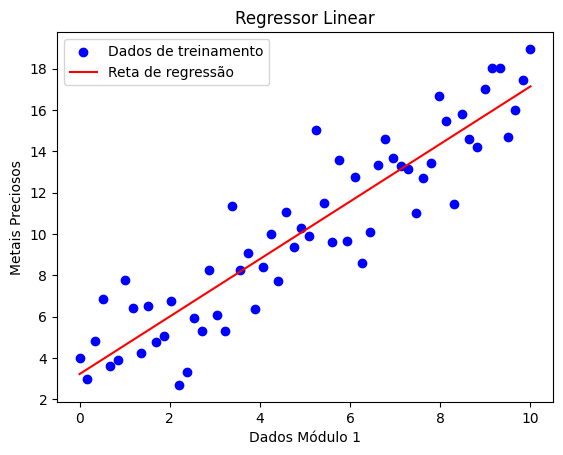

In [2]:
import matplotlib.pyplot as plt 

# Plotando os dados e a linha de regressão
plt.scatter(Dados_Modulo_1, Dados_Modulo_2, color='blue', label='Dados de treinamento')
plt.plot(Dados_Modulo_1, model.predict(Dados_Modulo_1), color='red', label='Reta de regressão')
plt.xlabel('Dados Módulo 1')
plt.ylabel('Metais Preciosos')
plt.legend()
plt.title('Regressor Linear')
plt.show()

Certa feita, Gabrilenzo viajou a uma galáxia muito distante e percebeu que lá o seu modelo já não desempenhava tão bem como antes.

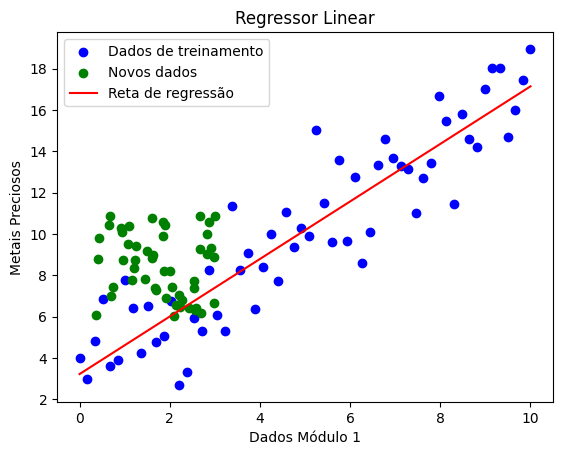

In [3]:
def ler_novos_dados(n):
    np.random.seed(24)
    Novos_Dados_Modulo_1 = np.random.uniform(0, 3, size=(n, 1))
    Novos_Dados_Modulo_2 = np.random.uniform(6.0, 11.0, size=n)
    return Novos_Dados_Modulo_1, Novos_Dados_Modulo_2

Novos_Dados_Modulo_1, Novos_Dados_Modulo_2 = ler_novos_dados(50) # Lê os novos dados disponíveis dos sensores

plt.scatter(Dados_Modulo_1, Dados_Modulo_2, color='blue', label='Dados de treinamento')
plt.scatter(Novos_Dados_Modulo_1, Novos_Dados_Modulo_2, color='green', label='Novos dados')
plt.plot(Dados_Modulo_1, model.predict(Dados_Modulo_1), color='red', label='Reta de regressão')
plt.xlabel('Dados Módulo 1')
plt.ylabel('Metais Preciosos')
plt.legend()
plt.title('Regressor Linear')
plt.show()

Para piorar a situação, o módulo de informação 2 parou de funcionar, impossibilitando Gabrilenzo de retreinar o seu modelo com os dados da nova galáxia.

Foi então que teve a ideia de retreinar o seu modelo anterior adicionando regularização com a ElasticNet.

Ao penalizar o crescimento da norma do coeficiente, o modelo se torna menos dependente em relação aos dados de treinamento e pode ser que generalize melhor para dados ainda não vistos.

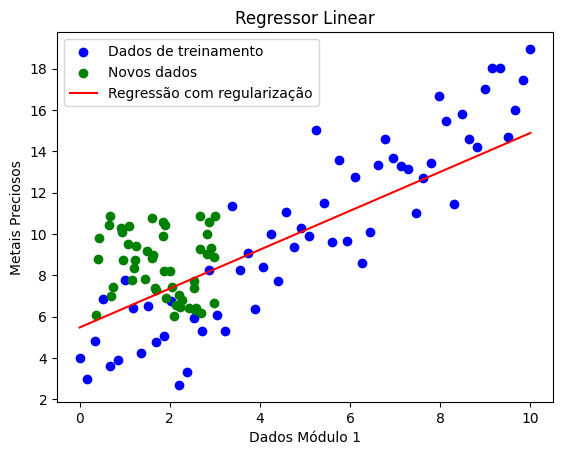

In [ ]:
from sklearn.linear_model import ElasticNet

model_reg = ElasticNet(alpha=4, l1_ratio=0.5)
model_reg.fit(Dados_Modulo_1, Dados_Modulo_2)

plt.scatter(Dados_Modulo_1, Dados_Modulo_2, color='blue', label='Dados de treinamento')
plt.scatter(Novos_Dados_Modulo_1, Novos_Dados_Modulo_2, color='green', label='Novos dados')
plt.plot(Dados_Modulo_1, model_reg.predict(Dados_Modulo_1), color='red', label='Regressão com regularização')
plt.xlabel('Dados Módulo 1')
plt.ylabel('Metais Preciosos')
plt.legend()
plt.title('Regressor Linear')
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error

# RMSE no conjunto de teste (dados da galáxia distante)
y_pred_test  = model.predict(Novos_Dados_Modulo_1)
y_pred_test_reg = model_reg.predict(Novos_Dados_Modulo_1)
rmse  = np.sqrt(mean_squared_error(Novos_Dados_Modulo_2, y_pred_test))
rmse_reg = np.sqrt(mean_squared_error(Novos_Dados_Modulo_2, y_pred_test_reg))

# Normas L2 dos coeficientes
w  = np.ravel(model.coef_)
w_reg = np.ravel(model_reg.coef_)
norm  = np.linalg.norm(w,  2)
norm_reg = np.linalg.norm(w_reg, 2)

print(f"RMSE (teste) - Sem regularização: {rmse:.4f}")
print(f"RMSE (teste) - ElasticNet:         {rmse_reg:.4f}")
print(f"||[w]||₂ (sem reg.): {norm:.4f}")
print(f"||[w]||₂ (ElasticNet): {norm_reg:.4f}")

RMSE (teste) - Sem regularização: 3.4021
RMSE (teste) - ElasticNet:         2.2230
||[w]||₂ (sem reg.): 1.3916
||[w]||₂ (ElasticNet): 0.9410


Obs: No caso de uma única feature, a norma L1 será igual a norma L2 que será igual ao valor absoluto do coeficiente